# Plots

Plot of truth vs spproximated single cut (this is using the spproximated 2d interpolation)

In [429]:
import sys
sys.path.insert(0,'..')

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri
%matplotlib notebook 

from algorithms import create_interp_1d_funcs, create_interp_2d_funcs, create_interp_dict, sigma_1d, sigma_2d_approx
from data_utils import create_1d_data, create_2d_data, create_data_dict, create_key, create_approx_cut_center_dict
from data_classes import DatasetInfo, KeyInfo, TrainingSet



### Plotting the Truth

In [317]:
def f(x):
        return np.array([np.sin(datum[0])*5 + np.sin(datum[1])*5 + np.sin(datum[2])*5 for datum in x]).reshape(-1, 1)

Say we are trying to plot a 3d plot of x1 and x2 against z.

In [422]:
# Creating test data
x1 = np.arange(-3, 3, 0.1)
x2 = np.arange(-3, 3, 0.1)
x3 = 0.5
xx1, xx2 = np.meshgrid(x1, x2)
xx1, xx2 = xx1.flatten().reshape(-1,1), xx2.flatten().reshape(-1,1)
xx3 = np.array([x3]*len(xx1)).reshape(-1,1)
x_test = np.hstack([xx1, xx2, xx3])
y_test = f(x_test)
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

x_test shape: (3600, 3)
y_test shape: (3600, 1)


Plotting the truth

<IPython.core.display.Javascript object>


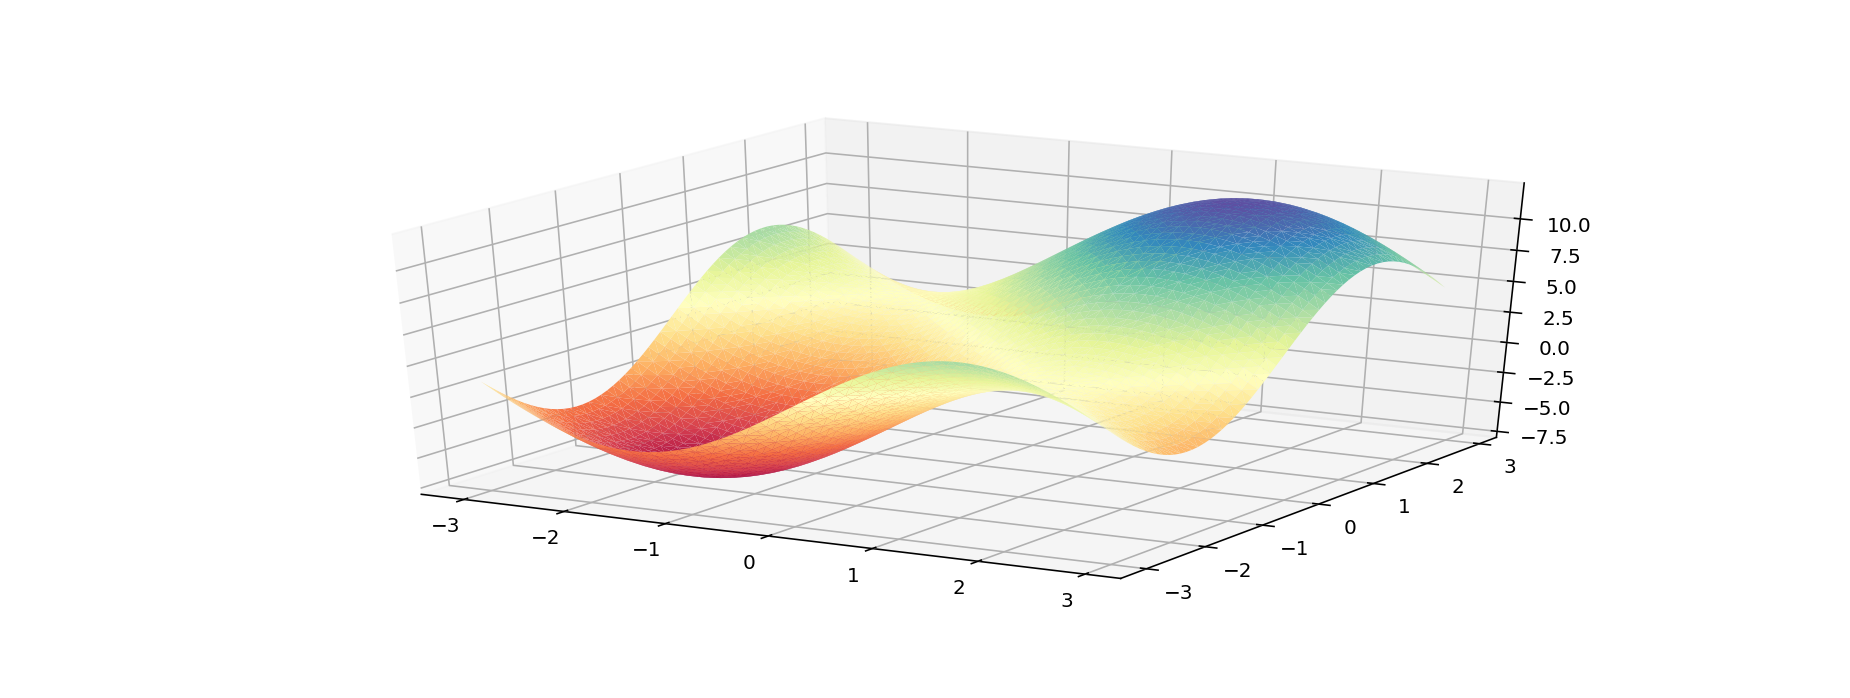

In [423]:
fig = plt.figure()
tri = mtri.Triangulation(xx1.flatten(), xx2.flatten())
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_trisurf(tri, y_test.flatten(), cmap=plt.cm.Spectral)

# ax.set_zlim(-5, 5)
plt.show()


### estimate

In [424]:
def predict(f0_1, f0_2s, cc1, cc2, interp_dict, test_point):
    sigma1d = sigma_1d(f0=f0_1, primary_cut_center=cc1, interp_dict=interp_dict, test_point=test_point)
    sigma2d = sigma_2d_approx(primary_f0=f0_1,
                             secondary_f0s=f0_2s,
                             primary_cut_center=cc1,
                             secondary_cut_center=cc2,
                             interp_dict=interp_dict,
                             test_point=test_point)
    
    y_estimate = f0_1 + sigma1d + sigma2d
    return y_estimate
    

In [425]:
cc1 = [-1.0, 0.2, 2.0]
cc2 = [0.04, -0.5, 1.89]
f0_1 = f(np.array([cc1]))
f0_2s = create_approx_cut_center_dict(primary_cut_center=cc1, secondary_cut_center=cc2, f=f)
data_range = [-10, 10, 3]
# ---Estimate---
data_dict = create_data_dict(data_range=data_range, f=f, primary_cut_center=cc1, secondary_cut_center=cc2)
interp_dict = create_interp_dict(data_dict)
y_estimate = [predict(f0_1, f0_2s, cc1, cc2, interp_dict, test_point).flatten()[0] for test_point in x_test]


### plotting the estimate

<IPython.core.display.Javascript object>


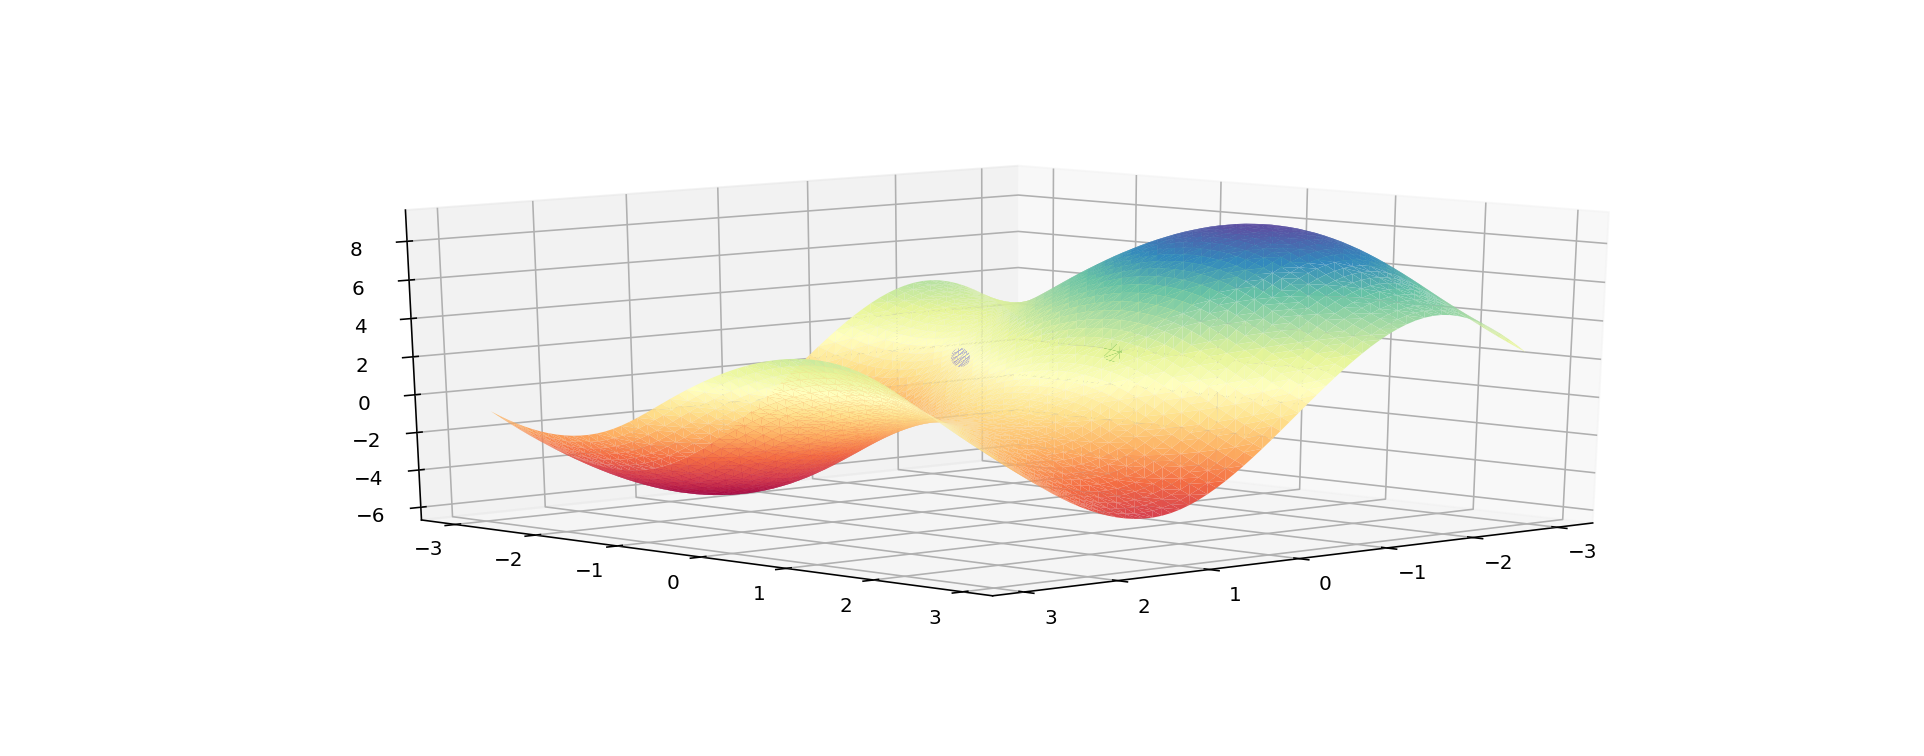

In [426]:
fig = plt.figure()
x1_ = x_test[:,0]
x2_ = x_test[:,1]
tri = mtri.Triangulation(x1_.flatten(), x2_.flatten())
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_trisurf(tri, y_estimate, cmap=plt.cm.Spectral)
#plotting the cc1
ax.scatter([cc1[0]], [cc1[1]], [cc1[2]], linewidths=5, c='g')
#plotting the cc2
ax.scatter([cc2[0]], [cc2[1]], [cc2[2]], linewidths=5, c='b')

# ax.set_zlim(-1, 8)
plt.show()

In [427]:
y_estimate = np.array(y_estimate).reshape(-1,1)
diff = y_test - y_estimate
abs_diff = np.abs(diff)
min_ = np.min(abs_diff)
argmin_ = np.argmin(abs_diff)
print(f'min: {min_}, argmin: {argmin_}')
print(f'x_min: ({x_test[argmin_, 0]},{x_test[argmin_,1]})')


min: 7.046232553697962e-05, argmin: 3002
x_min: (-2.8,2.0000000000000044)


### plotting the difference

<IPython.core.display.Javascript object>


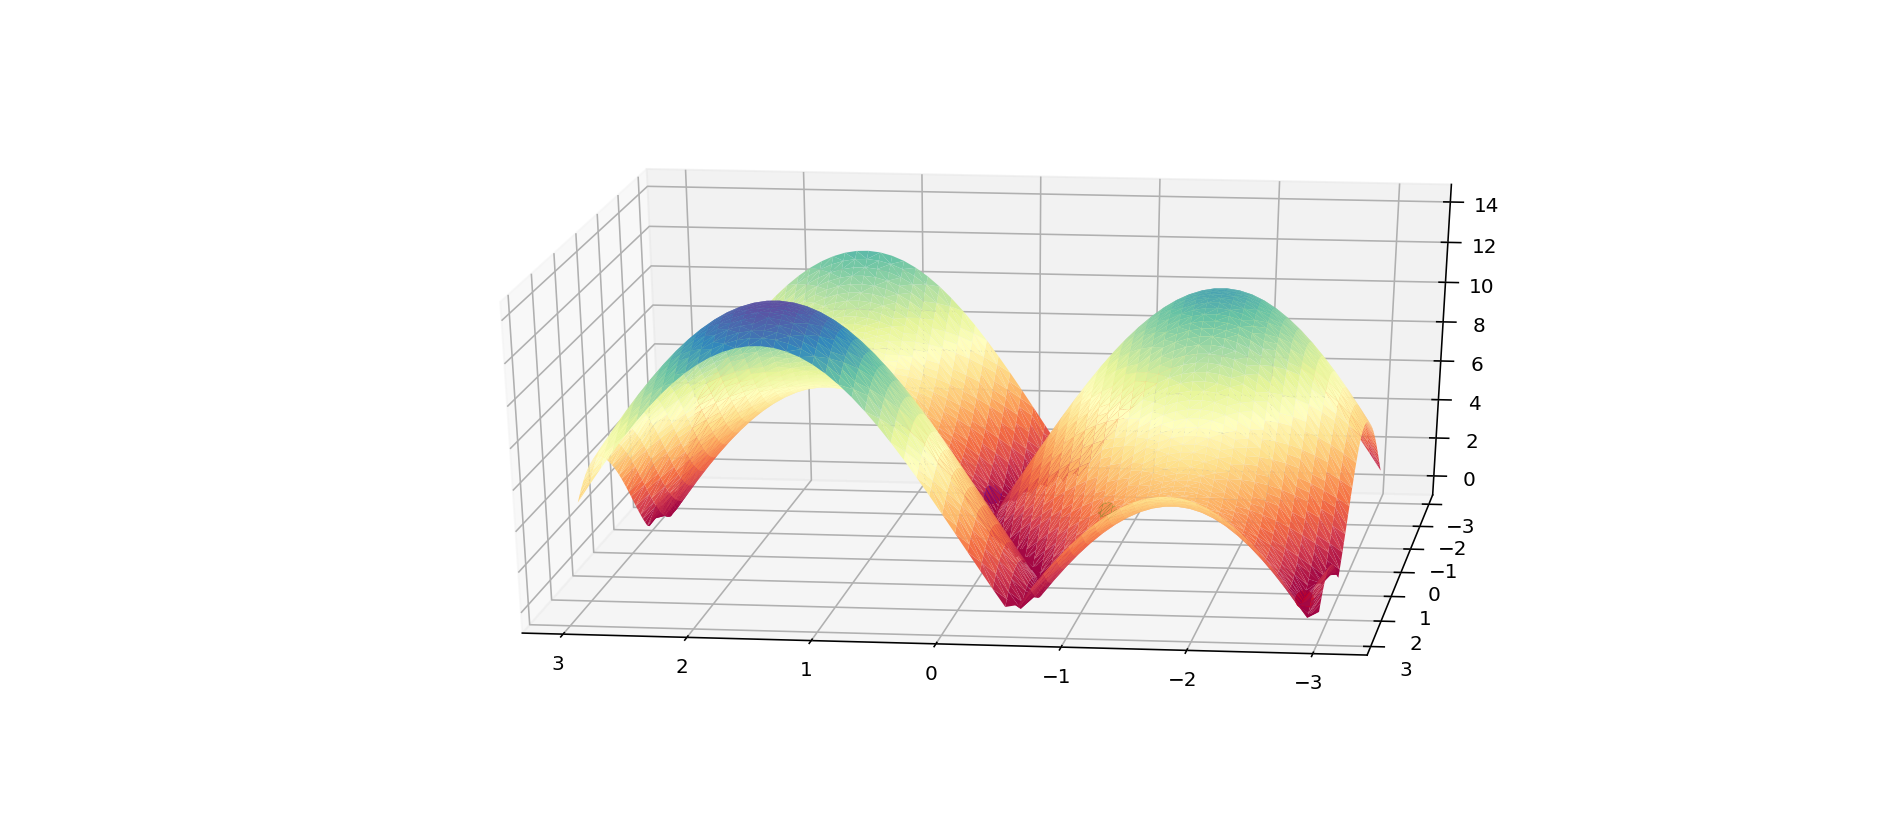

In [428]:
fig = plt.figure()
x1_ = x_test[:,0]
x2_ = x_test[:,1]
tri = mtri.Triangulation(x1_.flatten(), x2_.flatten())
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_trisurf(tri, abs_diff.flatten(), cmap=plt.cm.Spectral)
#plotting the minimum point
ax.scatter([x_test[argmin_, 0]], [x_test[argmin_, 1]], [min_],linewidths=5, c='r')
#plotting the cc1
ax.scatter([cc1[0]], [cc1[1]], [cc1[2]], linewidths=5, c='g')
#plotting the cc2
ax.scatter([cc2[0]], [cc2[1]], [cc2[2]], linewidths=5, c='b')

# ax.set_zlim(-1, 8)
plt.show()